Importing packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in data

In [5]:
df = pd.read_csv("USUnemploymentClaims.csv")

In [6]:
df.head()

,Report Date,Claims,Change
0,01/02/20,223000,-2000
1,01/09/20,214000,-9000
2,01/16/20,205000,-9000
3,01/23/20,223000,18000
4,01/30/20,217000,-6000


In [7]:
df

,Report Date,Claims,Change
0,01/02/20,223000,-2000
1,01/09/20,214000,-9000
2,01/16/20,205000,-9000
3,01/23/20,223000,18000
4,01/30/20,217000,-6000
5,02/06/20,203000,-14000
6,02/13/20,206000,3000
7,02/20/20,211000,5000
8,02/27/20,219000,8000
9,03/05/20,215000,-4000


Text(0, 0.5, 'Claims')

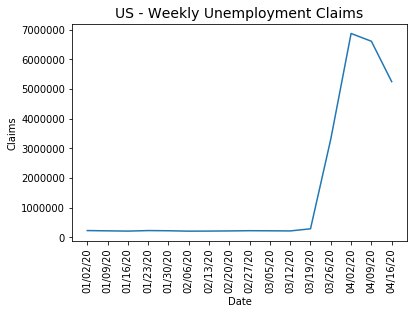

In [39]:
plt.plot(df['Report Date'],df['Claims'])
plt.title("US - Weekly Unemployment Claims",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Claims")

Text(0, 0.5, 'Claims')

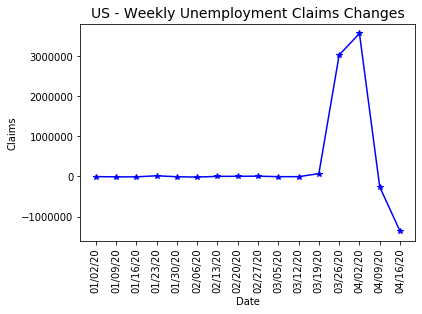

In [18]:
plt.plot(df['Report Date'],df['Change'],'*-b')
plt.title("US - Weekly Unemployment Claims Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Claims")

In [34]:
percentage = [0]
for i in range(1,len(df),1):
#for i in range(1,5,1):
    j = i-1
    delta = (df['Claims'][i]-df['Claims'][j])/(df['Claims'][j])
    delta = round(delta * 100,2)
    #print(round(delta,2))
    percentage.append(delta)
    
df['Percentage'] = percentage

df

,Report Date,Claims,Change,Percentage
0,01/02/20,223000,-2000,0.00
1,01/09/20,214000,-9000,-4.04
2,01/16/20,205000,-9000,-4.21
3,01/23/20,223000,18000,8.78
4,01/30/20,217000,-6000,-2.69
5,02/06/20,203000,-14000,-6.45
6,02/13/20,206000,3000,1.48
7,02/20/20,211000,5000,2.43
8,02/27/20,219000,8000,3.79
9,03/05/20,215000,-4000,-1.83


Text(0, 0.5, 'Percentage(%)')

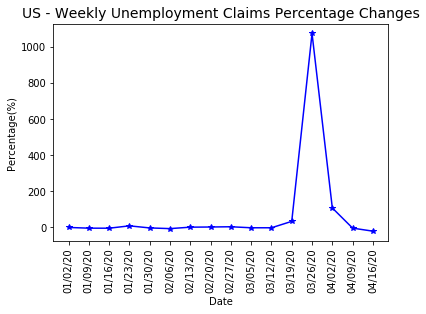

In [38]:
plt.plot(df['Report Date'],df['Percentage'],'*-b')
plt.title("US - Weekly Unemployment Claims Percentage Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Percentage(%)")

In [42]:
totalClaimsCovid19 = df['Claims'][11:16].sum()
print("Total unemployment Claims since COVID-19 Outbreak and Shelter in Place in mid-March:",totalClaimsCovid19)

Total unemployment Claims since COVID-19 Outbreak and Shelter in Place in mid-March: 22307000
